In [ ]:
# Install required packages
!python3 -m pip install pandas matplotlib seaborn scikit-learn mlxtend



###  Task 1: Import Libraries
This block imports all necessary libraries for classification, clustering, visualization, and association rule mining.


In [5]:
# Task 1: Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


###  Task 2: Load Dataset
We load the UCI Adult Income dataset, clean missing values, and convert categorical columns to numeric using Label Encoding.


In [2]:
# Import the pandas library to handle data in tabular form
import pandas as pd

# URL of the UCI Adult Income dataset (comma-separated values file)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# List of column names corresponding to the dataset features and target
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

# Load the dataset from the URL, assign column names, and treat ' ?' as missing values (NaN)
df = pd.read_csv(url, header=None, names=columns, na_values=' ?')

# Remove rows with any missing values to clean the data
df.dropna(inplace=True)

# Encode all categorical columns as numeric values for machine learning compatibility
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Display the first few rows of the cleaned and encoded dataframe
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


###  Task 3: Train-Test Split
We split the dataset into training and testing sets to build and evaluate classification models.


In [6]:
# Separate features (X) and target variable (y)
X = df.drop("income", axis=1)  # All columns except 'income' are features
y = df["income"]               # 'income' column is the target to predict

# Split data into training (80%) and testing (20%) sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


###  Task 4: Classification Models
We train two classification models: Decision Tree and Naive Bayes to predict income category (<=50K or >50K).


In [7]:
# Task 4: Classification Models

# Model 1: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Model 2: Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)


## Task 5: Hyperparameter Tuning

Hyperparameters for the Decision Tree classifier based on cross-validation accuracy. This systematic search helps select optimal values like `max_depth`, `criterion`, and `min_samples_split` to improve model performance and generalization.


#### **Hyperparameter Tuning Technique Used**  
`GridSearchCV` is used to systematically search through different combinations of hyperparameters for the Decision Tree classifier. It uses 5-fold cross-validation to evaluate each combination, helping identify the best settings that result in the highest accuracy. This approach avoids manual tuning and helps find optimal values more reliably.

#### **Chosen Parameters**

The tuning process evaluates different values for three key hyperparameters of the Decision Tree classifier: `criterion`, `max_depth`, and `min_samples_split`. These parameters directly influence the tree's structure and its ability to balance between underfitting and overfitting.

- **`criterion`**: Determines the function used to measure the quality of a split.
  - `'gini'`: Calculates the Gini impurity; faster and commonly used for classification tasks.
  - `'entropy'`: Based on information gain; more computationally intensive but can result in better splits in some cases.
  Choosing the right criterion can impact the accuracy and interpretability of the model.

- **`max_depth`**: Specifies the maximum number of levels in the decision tree. 
  - A small value may cause the model to underfit by not capturing enough patterns.
  - A large value may lead to overfitting by learning noise in the training data.
  Limiting depth helps ensure better generalization to unseen data.

- **`min_samples_split`**: Sets the minimum number of samples required to split an internal node.
  - Higher values reduce the number of splits, making the model simpler and more resistant to overfitting.
  - Lower values allow more splits, potentially increasing model complexity.




In [13]:
# Task: Hyperparameter Tuning on Decision Tree

# Define the model
dt = DecisionTreeClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV to find the best combination
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best estimator from the grid search
best_dt_model = grid_search.best_estimator_

# Evaluate on test data
y_pred_dt = best_dt_model.predict(X_test)

# Performance metrics
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt, pos_label=1))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Accuracy: 0.8559588927565058
F1 Score: 0.7020911895783339
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      4503
           1       0.74      0.67      0.70      1530

    accuracy                           0.86      6033
   macro avg       0.81      0.79      0.80      6033
weighted avg       0.85      0.86      0.85      6033



###  Task 6: Model Evaluation
We evaluate the performance of all classifiers using Accuracy, F1 Score, Confusion Matrix, and ROC Curve.


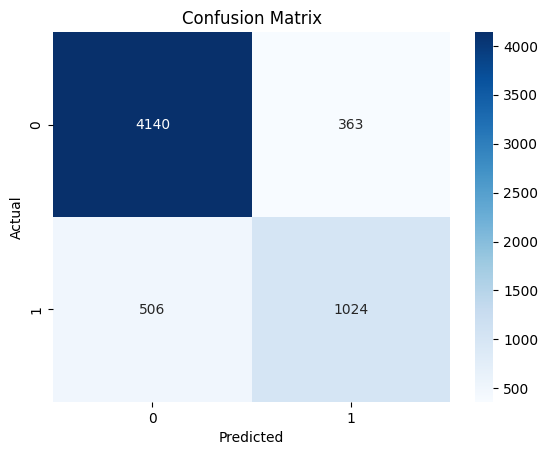

Accuracy: 0.8559588927565058
F1 Score: 0.7020911895783339
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      4503
           1       0.74      0.67      0.70      1530

    accuracy                           0.86      6033
   macro avg       0.81      0.79      0.80      6033
weighted avg       0.85      0.86      0.85      6033



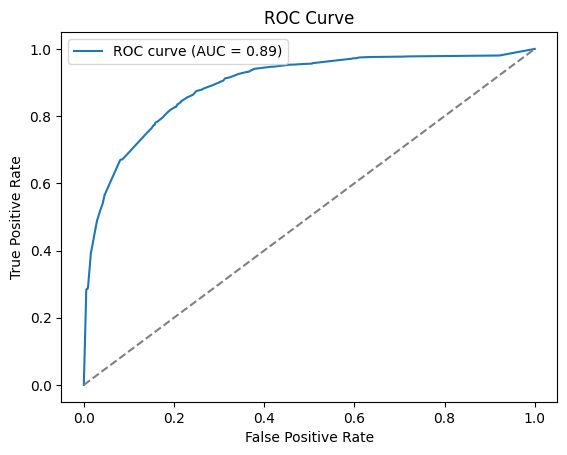

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'model' below with your trained classifier, e.g., best_dt_model
model = best_dt_model  

# Predict class labels
y_pred = model.predict(X_test)

# Predict probabilities for ROC curve (probability of positive class)
y_proba = model.predict_proba(X_test)[:, 1]

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print accuracy and F1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


###  Task 7: Clustering
We apply K-Means clustering to segment individuals into two groups and visualize the result using PCA.

#### Explanation of Identified Groups
The K-Means algorithm split the data into 2 clusters based on similarities in all features.

Cluster 0 likely represents individuals with characteristics such as lower working hours, less education, or lower income-related attributes.

Cluster 1 likely groups individuals with higher values in those features, such as more education, longer working hours, or higher income indicators.

By reducing dimensions with PCA, the scatter plot shows how these two groups are separated in the feature space, reflecting meaningful differences in demographics and work-related factors.




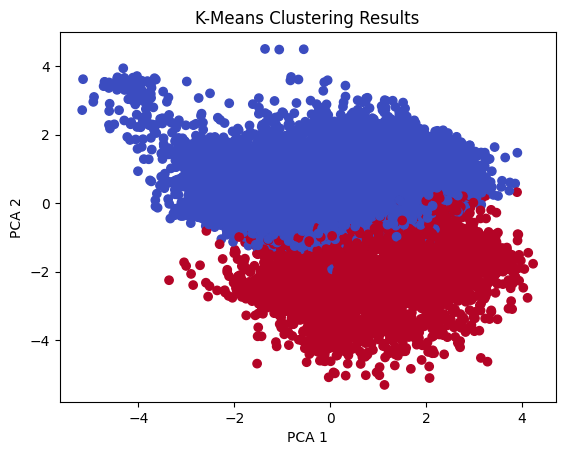

In [10]:
# Task 7: Clustering with K-Means

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='coolwarm')
plt.title("K-Means Clustering Results")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


###  Task 8: Association Rule Mining
We use the Apriori algorithm to find frequent itemsets and generate association rules on a sample of income-related transactions.

###### *identified patterns*

#### Insights on Real-World Application of These Patterns #### 
Businesses can target marketing by knowing that people with certain education levels and job types tend to have higher income, so premium products or services can be offered to those groups.

Employers can use such patterns to design better job roles or training programs tailored to employee demographics likely to lead to higher income or job satisfaction.

Policy makers can focus social programs on groups identified with lower income patterns, improving resource allocation and intervention effectiveness.

Financial institutions might use these rules to customize loan or credit offers based on the demographic and employment profiles that predict better repayment capacity.

These association rules reveal hidden relationships in the data that can guide more informed, data-driven decisions in marketing, HR, finance, and social welfare.

In [11]:
# Task 8: Association Rule Mining (Using Sample Transaction Data)

dataset = [['workclass_Private', 'education_Bachelors', 'income_>50K'],
           ['education_HS-grad', 'sex_Female', 'income_<=50K'],
           ['education_Bachelors', 'sex_Male', 'income_>50K'],
           ['workclass_Private', 'marital-status_Married', 'income_>50K'],
           ['workclass_Private', 'education_Bachelors', 'income_>50K']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

frequent_items = apriori(df_trans, min_support=0.5, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
0,(income_>50K),(education_Bachelors),0.6,0.75,1.25
1,(education_Bachelors),(income_>50K),0.6,1.00,1.25
2,(income_>50K),(workclass_Private),0.6,0.75,1.25
3,(workclass_Private),(income_>50K),0.6,1.00,1.25


#### From the output, the meaningful patterns identified are: ####

People with income > 50K are often found to have a Bachelor’s degree (75% confidence), and conversely, those with a Bachelor’s degree always (100% confidence) have income > 50K.

People with income > 50K frequently work in the private sector (75% confidence), and those working in the private sector always (100% confidence) have income > 50K.

These patterns highlight strong positive associations between higher income, having a Bachelor's degree, and working in the private sector.